In [2]:
from cmdstanpy import CmdStanModel
import arviz as az
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#Translates a string in a form of yyyy-mm to a date
def translate_date(string: str):
    date = string.split("-")
    return datetime.date(int(date[0]), int(date[1]), 1)

def translate_all(dataframe):
    for i in range(len(dataframe)):
        dataframe.loc[i, "TIME"] = translate_date(dataframe.loc[i, "TIME"])
    return dataframe

def truncate_dates(inflation_df, unemployment_df):
    inflation_date_start = inflation_df["TIME"][:1].values[0]
    unemployment_date_start = unemployment_df["TIME"][:1].values[0]
    inflation_date_end = inflation_df["TIME"][-1:].values[0]
    unemployment_date_end = unemployment_df["TIME"][-1:].values[0]

    # print("inflation dates: " + str(inflation_date_start) + " - " + str(inflation_date_end))
    # print("unemployment dates: " + str(unemployment_date_start) + " - " + str(unemployment_date_end))


    if inflation_date_start > unemployment_date_start:
        unemployment_df = unemployment_df.loc[unemployment_df["TIME"] >= inflation_date_start]
    else:
        inflation_df = inflation_df.loc[inflation_df["TIME"] >= unemployment_date_start]
    
    if inflation_date_end < unemployment_date_end:
        unemployment_df = unemployment_df.loc[unemployment_df["TIME"] <= inflation_date_end]
    else:
        inflation_df = inflation_df.loc[inflation_df["TIME"] <= unemployment_date_end]

    return [inflation_df, unemployment_df]



inflation = pd.read_csv("inflacja.csv")
inflation = translate_all(inflation)

unemployment = pd.read_csv("unemployment.csv")
unemployment = translate_all(unemployment)

In [41]:
locations = ["POL", "HUN", "CZE", "DEU", "ESP", "FRA", "USA", "CAN", "CHL", "JPN"]
infl_list = []
unemp_list = []
country_list = []

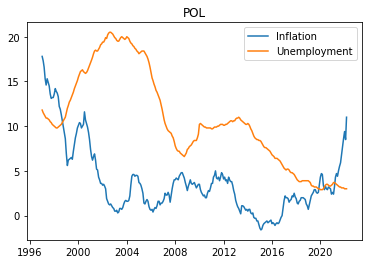

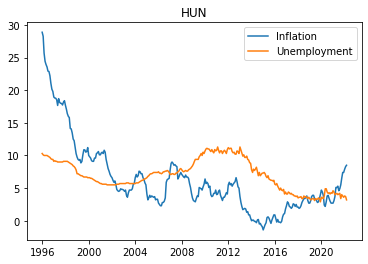

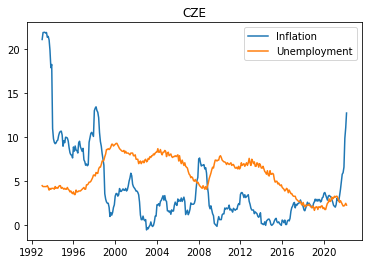

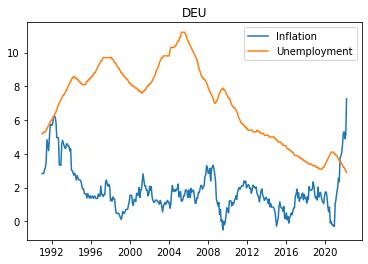

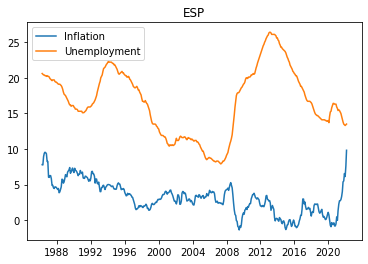

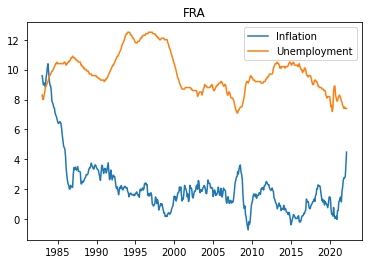

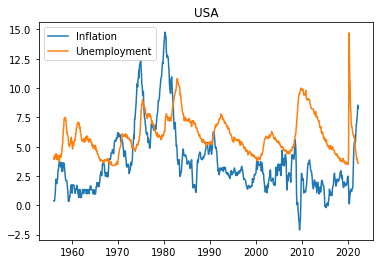

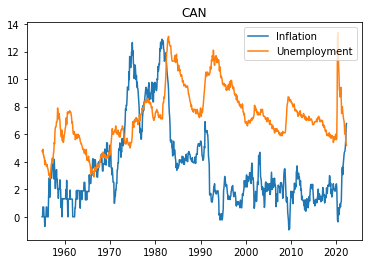

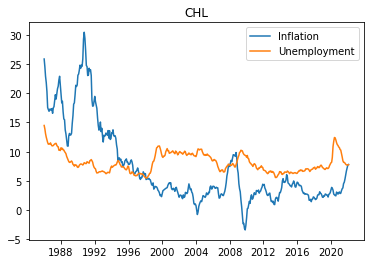

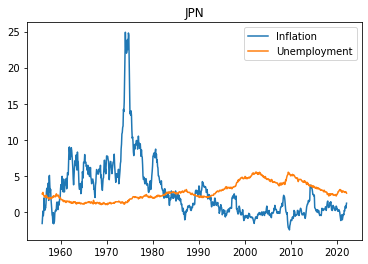

In [43]:
for count, location in enumerate(locations):
    infl, unemp = truncate_dates(inflation.loc[inflation["LOCATION"] == location], unemployment.loc[unemployment["LOCATION"] == location])
    # infl_list.append(infl)
    # unemp_list.append(unemp)
    country = infl, unemp
    country_list.append(country)
    plt.figure(count)
    plt.plot(infl["TIME"], infl["Value"])
    plt.plot(unemp["TIME"], unemp["Value"])
    plt.legend(["Inflation", "Unemployment"])
    plt.title(location)
    plt.show

In [29]:
len(infl_list[8])

434

In [47]:
range(len(infl_list[0]))

range(0, 303)

In [26]:
infl_list[0]["Value"]

14475    17.8
14476    17.3
14477    16.6
14478    15.3
14479    14.6
         ... 
14773     7.8
14774     8.6
14775     9.4
14776     8.5
14777    11.0
Name: Value, Length: 303, dtype: float64

In [55]:
for country in country_list:
    for i in range (len(country[0])):
        
        print(len(country[0]))
        # infl, unemp = country
        # print(infl["Value"], unemp["Value"])

303
315
351
375
432
471
796
808
434
795
303
315
351
375
432
471
796
808
434
795


In [20]:
stan_file = r"C:\Studia\Data-Analytics\Projekt-Proper\Inflation_model_phillips.stan"
model = CmdStanModel(stan_file=stan_file)
data = {
    "N": len(infl_list[0]),
    "x": range(len(infl_list[0])),
    "y": infl_list[0]["Value"]
}
fit = model.sample(data = data, iter_sampling = 100, iter_warmup=100)

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status



chain 1 |█████     | 00:02 Iteration:   1 / 200 [  0%]  (Warmup)

chain 1 |██████████| 00:06 Iteration: 101 / 200 [ 50%]  (Sampling)


chain 1 |██████████| 00:06 Sampling completed                     
chain 2 |██████████| 00:06 Sampling completed                     
chain 3 |██████████| 00:06 Sampling completed                     
chain 4 |██████████| 00:06 Sampling completed                     


INFO:cmdstanpy:CmdStan done processing.


In [21]:
df = fit.draws_pd()
df

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,alpha,beta,sigma,...,y_gen[294],y_gen[295],y_gen[296],y_gen[297],y_gen[298],y_gen[299],y_gen[300],y_gen[301],y_gen[302],y_gen[303]
0,-7984.65,0.994748,2.190250e-08,10.0,1023.0,0.0,7985.47,0.304570,7.335220e-07,0.680040,...,4.18661,4.85422,4.07962,4.71223,3.29779,4.00232,3.70081,4.32036,4.29418,5.52963
1,-7984.17,0.981830,2.190250e-08,2.0,3.0,0.0,7984.71,0.304570,6.985160e-07,0.680040,...,4.36603,3.31067,2.96668,3.80175,4.43439,4.53879,4.14874,3.38396,3.69811,4.43850
2,-7985.68,0.781147,2.190250e-08,10.0,1023.0,0.0,7987.42,0.304560,6.789290e-07,0.680036,...,3.85965,3.67016,2.68988,4.05898,3.77117,4.19595,3.03260,4.58318,4.35328,4.15027
3,-7984.10,1.000000,2.190250e-08,2.0,7.0,0.0,7985.24,0.304560,7.042580e-07,0.680036,...,2.51123,3.36347,3.85938,4.11726,4.09569,4.06725,3.56323,4.42075,4.14270,3.91135
4,-7984.30,0.953714,2.190250e-08,10.0,1023.0,0.0,7985.25,0.304578,7.275270e-07,0.680039,...,4.23462,3.89286,4.12543,4.64009,3.26087,6.07476,4.14446,4.73565,5.04022,3.44125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,-7282.62,0.914061,2.671000e-08,10.0,1023.0,0.0,7282.91,-0.078735,8.230460e-07,0.740356,...,3.41920,2.86172,3.67661,2.94688,3.75166,5.37759,4.87736,3.14120,5.00364,5.33094
396,-7283.01,0.936381,2.671000e-08,10.0,1023.0,0.0,7285.98,-0.078735,8.140160e-07,0.740352,...,4.27279,3.94482,3.91742,4.49889,5.39172,3.97190,4.15670,4.59911,3.84724,4.53235
397,-7283.55,0.903242,2.671000e-08,10.0,1023.0,0.0,7284.02,-0.078739,8.590670e-07,0.740355,...,4.00371,4.51593,4.18645,4.51616,5.27507,5.28457,4.80417,5.09732,4.82421,4.43064
398,-7282.82,0.981935,2.671000e-08,10.0,1023.0,0.0,7285.14,-0.078706,8.138710e-07,0.740360,...,4.50221,3.96021,4.07765,3.84576,3.39169,3.59262,3.77790,3.87792,5.81784,4.46531


In [22]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
name,,,,,,,,,
lp__,-1.500000e+04,7.500000e+03,1.100000e+04,-3.300000e+04,-8.000000e+03,-7300.000000,2.1,0.12,12000.0
alpha,2.600000e-02,3.900000e-01,5.700000e-01,-8.300000e-01,3.000000e-01,0.700000,2.1,0.12,21000.0
beta,8.000000e-07,1.200000e-07,1.800000e-07,5.800000e-07,7.800000e-07,0.000001,2.1,0.12,11.0
sigma,6.000000e-01,1.100000e-01,1.600000e-01,3.200000e-01,6.800000e-01,0.740000,2.1,0.12,23000.0
y_gen[1],5.900000e-02,3.700000e-01,7.500000e-01,-1.100000e+00,1.200000e-01,1.200000,4.1,0.24,1.4
...,...,...,...,...,...,...,...,...,...
y_gen[299],4.400000e+00,2.600000e-01,6.900000e-01,3.400000e+00,4.200000e+00,5.600000,7.0,0.42,1.2
y_gen[300],4.300000e+00,3.200000e-01,7.700000e-01,3.200000e+00,4.200000e+00,5.700000,5.9,0.35,1.2
y_gen[301],4.300000e+00,2.600000e-01,7.400000e-01,3.200000e+00,4.200000e+00,5.600000,7.9,0.47,1.2


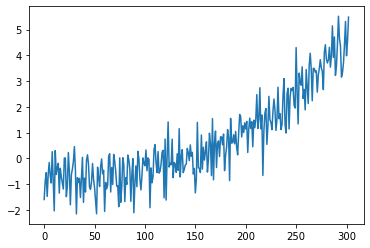

In [24]:
plt.figure(0)
plt.plot(range(len(infl_list[0])), df.iloc[100, 10:])
plt.show()

In [125]:
coef= np.polyfit(range(len(infl_list[0])), df.iloc[3000, 12:], 3)
coef

array([ 3.72823865e-05, -1.60626882e-02,  1.61615882e+00,  1.81217347e+00])

In [117]:
x = range(len(infl_list[0]))
# x2 = np.multiply(x, x)
# x2 * coef[2]

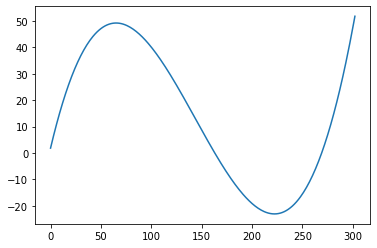

In [126]:
x = range(len(infl_list[0]))
x2 = np.multiply(x, x)
x3 = np.multiply(x2, x)
x4 = np.multiply(x3, x)
x5 = np.multiply(x4, x)
plt.figure(1)
plt.plot(x, x3*coef[0] + x2*coef[1] + x*coef[2] + coef[3])
plt.show()